In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,datasets,models

In [2]:
(x_train,y_train),(x_test,y_test)=datasets.fashion_mnist.load_data()
(x_train,x_test)=(x_train/255,x_test/255)

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(28,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(28,(3,3),activation='relu'))

In [4]:
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))

In [5]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [6]:
history=model.fit(x_train,y_train,validation_split=0.1,epochs=15)

Epoch 1/15
1688/1688 [==============================] - 65s 35ms/step - loss: 0.5402 - accuracy: 0.7981 - val_loss: 0.3813 - val_accuracy: 0.8578
Epoch 2/15
1688/1688 [==============================] - 58s 34ms/step - loss: 0.3539 - accuracy: 0.8704 - val_loss: 0.3304 - val_accuracy: 0.8777
Epoch 3/15
1688/1688 [==============================] - 56s 33ms/step - loss: 0.3070 - accuracy: 0.8871 - val_loss: 0.3235 - val_accuracy: 0.8770
Epoch 4/15
1688/1688 [==============================] - 57s 34ms/step - loss: 0.2757 - accuracy: 0.8984 - val_loss: 0.3095 - val_accuracy: 0.8843
Epoch 5/15
1688/1688 [==============================] - 55s 32ms/step - loss: 0.2525 - accuracy: 0.9060 - val_loss: 0.3142 - val_accuracy: 0.8873
Epoch 6/15
1688/1688 [==============================] - 58s 34ms/step - loss: 0.2353 - accuracy: 0.9126 - val_loss: 0.2895 - val_accuracy: 0.8922
Epoch 7/15
1688/1688 [==============================] - 57s 34ms/step - loss: 0.2161 - accuracy: 0.9193 - val_loss: 0.2854 -

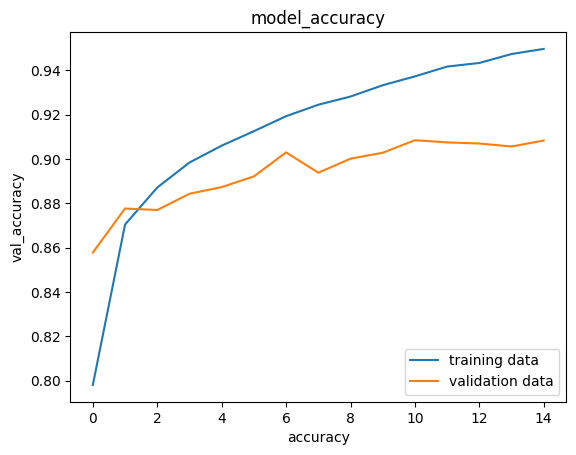

In [7]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('accuracy')
plt.ylabel('val_accuracy')
plt.title('model_accuracy')
plt.legend(['training data','validation data'],loc='lower right')
plt.show()

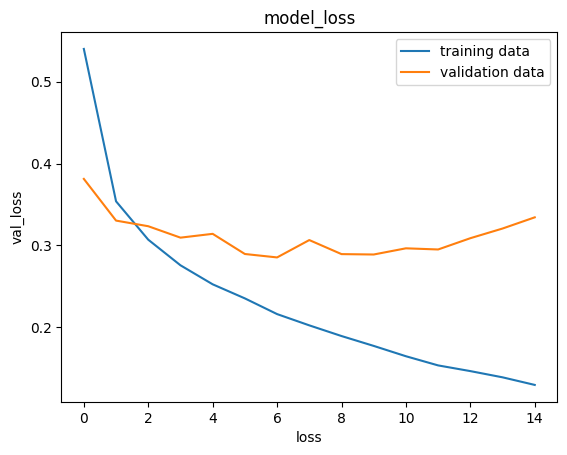

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('loss')
plt.ylabel('val_loss')
plt.title('model_loss')
plt.legend(['training data','validation data'],loc='upper right')
plt.show()

In [9]:
y_pred=model.predict(x_test)

313/313 [==============================] - 3s 9ms/step


In [10]:
import numpy as np
y_pred=np.argmax(y_pred,axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 7])

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9055